In [26]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns 
import geopandas as gpd
from shapely.geometry import polygon
import missingno as misno
import os 
import wget 
import openpyxl
import math

In [27]:
filename = wget.download("https://www.ers.usda.gov/media/rbmpu1zi/mapdata2021.xlsx")

In [28]:
df = pd.read_excel(os.getcwd()+'/mapdata2021.xlsx',skiprows=4)
df = df.rename(columns={'Unnamed: 0':'state', 'Percent':'pct_food_insecure'})
df = df[['state', 'pct_food_insecure']]
df.head()

,state,pct_food_insecure
0,U.S.,10.4
1,AK,9.5
2,AL,13.1
3,AR,15.0
4,AZ,10.1


Check for missing data

<Axes: >

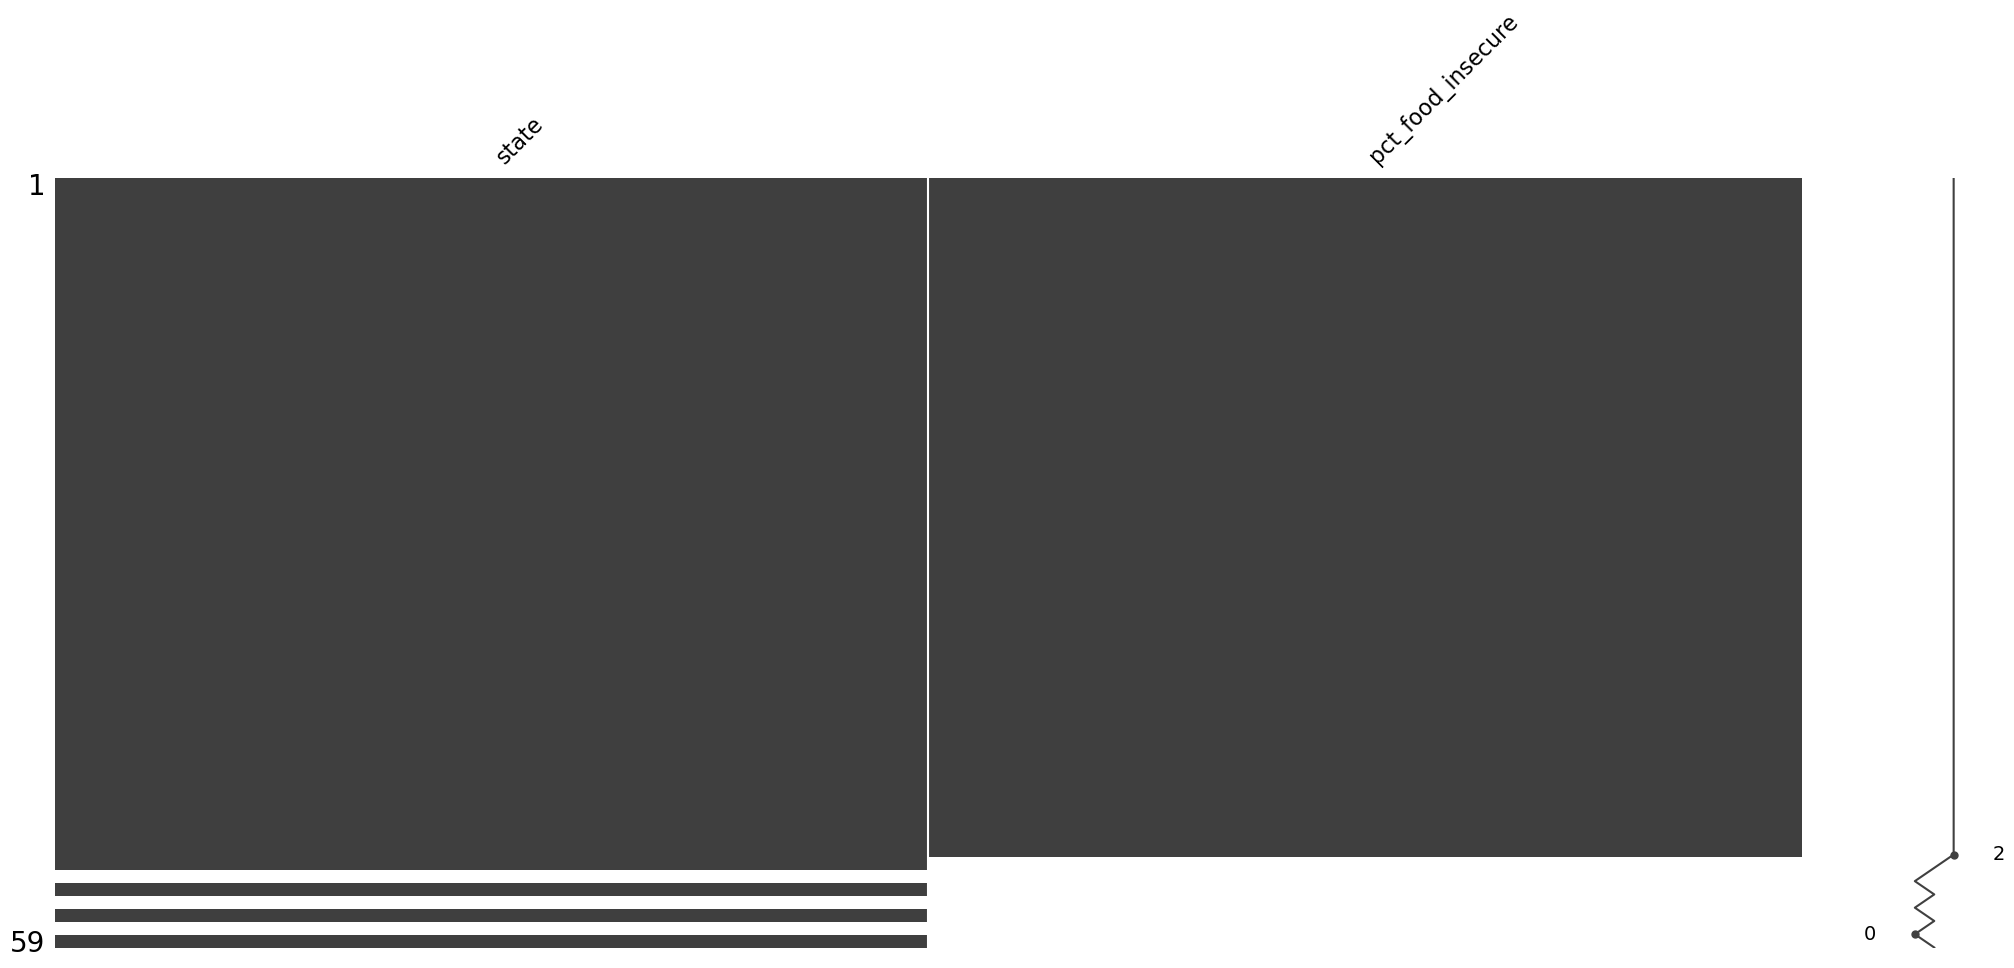

In [29]:
misno.matrix(df)

In [30]:
df[df.pct_food_insecure.isnull()]

,state,pct_food_insecure
52,*Difference from U.S. average was statisticall...,NaN
53,NaN,NaN
54,1Totals exclude households for which food secu...,NaN
55,NaN,NaN
56,2Margin of error with 90 percent confidence (1...,NaN
57,NaN,NaN
58,"Source: USDA, Economic Research Service using ...",NaN


In [31]:
df

,state,pct_food_insecure
0,U.S.,10.4
1,AK,9.5
2,AL,13.1
3,AR,15.0
4,AZ,10.1
5,CA,9.6
6,CO,10.5
7,CT,9.6
8,DC,9.0
9,DE,11.2


In [32]:
df=df[df.state.str.len()==2]

Check if the histogram is reasonable

<Axes: >

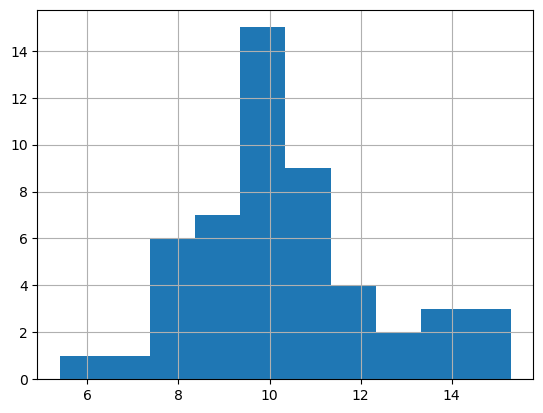

In [33]:
df.pct_food_insecure.hist()

In [34]:
wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

'cb_2018_us_state_500k (1).zip'

In [36]:
gdf = gpd.read_file(os.getcwd()+'/Users/lydia/cb_2018_us_state_500k.zip')

DriverError: '/vsizip//Users/lydia/Users/lydia/cb_2018_us_state_500k.zip' does not exist in the file system, and is not recognized as a supported dataset name.